---
# **L.O.V.E.** - LANGUAGE OVER VARIOUS EMOTIONS
---
# Universidade de São Paulo - USP
## Instituto de Ciências Matemáticas e de Computação (ICMC)
### Departamento de Ciências de Computação (SCC)
### SCC0633/SCC5908 - Processamento de Linguagem Natural

# **Projeto Final**
**Professor:** Prof. Dr. Thiago A.S Pardo  
**Estagiário PAE:** Germano A.Z Jorge

**Grupo:**  
- Gabriela Rodrigues do Prado, 11892917
- Gabriel Vicente Rodrigues, 11795377
- Laís Piai, 15600960
- Maria Júlia Soares De Grandi, 12542501
- Paloma Botto de Medeiros Serrão, 12689641
---

# Caminhos Globais

A pasta do Drive onde encontram-se os documentos é: https://drive.google.com/drive/folders/1b-KirLCYTaUwxoR6tb_qhh2rKdRgN62b?usp=sharing

Altere a variável **caminho** para a localização da pasta disponibilizada em seu Google Drive.

Para ter a pasta compartilhada em seu drive, basta acessar a pasta e selecionar a opção "Adicionar atalho".

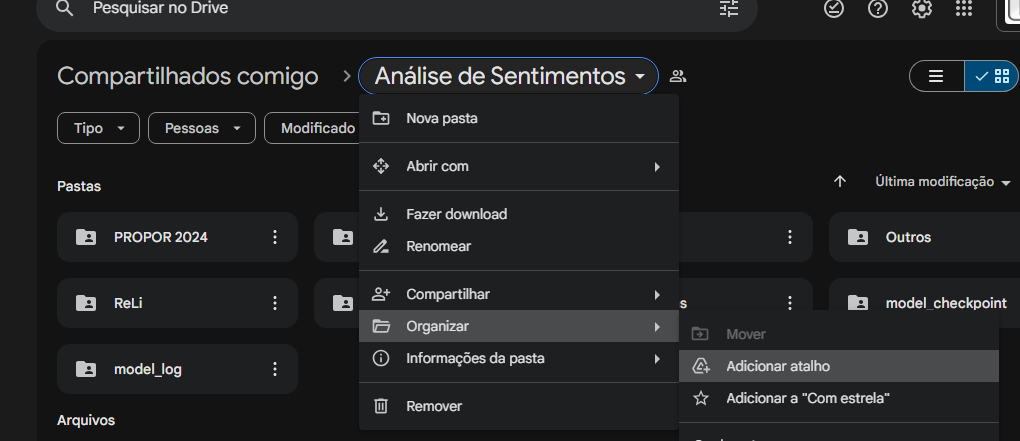

In [ ]:
import os

caminho = "/content/drive/MyDrive/Análise de Sentimentos"
caminhoRepositorio = os.path.join(caminho, "ReLi")


# Rodar modelos


In [ ]:
# @markdown Selecione para carregar os modelos a partir dos arquivos de checkpoint salvos. Caso não hajam arquivos salvos previamente, os modelos serão treinados.
recover_checkpoint = True #@param {type:"boolean"}

# Leitura e formatação dos dados de TXT para CSV

In [ ]:
import pandas as pd
from google.colab import drive


In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
nomeArquivos = [
    "ReLi-Amado",
    "ReLi-Meyer",
    "ReLi-Orwell",
    "ReLi-Reboucas",
    "ReLi-Salinger",
    "ReLi-Saramago",
    "ReLi-Sheldon"
]

A função abaixo é usada para ler cada linha dos arquivos TXT do córpus e organizá-lo em formato CSV que possar ser mais facilmente manipulado com o uso de bibliotecas como Pandas.

In [ ]:
def geracaoDataFrame(listaLinhas):
  data ={"livro": [], "resenha": [], "titulo": [], "corpo": [], "idFrase": [], "idPalavra": [],"palavra": [], "pos": [], "alvo": [], "opiniao": [], "polaridade": []}

  currLivro = None
  currResenha = None
  currTitulo = None
  currCorpo = None
  currIdFrase = None
  currIdPalavra = None
  for idxLinha in range(1, len(listaLinhas)):
    currLinha = listaLinhas[idxLinha]
    if currLinha.startswith("#Livro_"):
      currLivro = currLinha[1:].strip()


    elif currLinha.startswith("#Resenha_"):
      currResenha = currLinha[1:].strip()

    elif currLinha.startswith("#TÃ­tulo_"):
      currTitulo = True
      currCorpo = False
      currIdFrase = 0
      currIdPalavra = 0

    elif currLinha.startswith("#Corpo_"):
      currCorpo = True
      currTitulo = False
      currIdFrase = 0
      currIdPalavra = 0

    elif len(currLinha) == 0:
      currIdFrase+=1
      currIdPalavra = 0

    elif currLinha.startswith(("#Nota_", "[features = word, pos, object, opinion, polarity, help]" )):
      continue
    else:
      feats = currLinha.split("\t")
      if(len(feats) < 5):
        print(feats)
      data["livro"].append(currLivro)
      data["resenha"].append(currResenha)
      data["titulo"].append(currTitulo)
      data["corpo"].append(currCorpo)
      data["idFrase"].append(currIdFrase)
      data["idPalavra"].append(currIdPalavra)
      data["palavra"].append(feats[0].strip())
      data["pos"].append(feats[1].strip())
      data["alvo"].append(feats[2].strip())
      data["opiniao"].append(feats[3].strip())
      data["polaridade"].append(feats[4].strip())
      currIdPalavra+=1

  return pd.DataFrame(data)


Cada um dos arquivos lidos é transformado em um DataFrame e armazenado em uma das entradas do dicinário **dfs**.

In [ ]:
dfs = {}
for nome in nomeArquivos:
  caminhoArquivo = os.path.join(caminhoRepositorio, "TXTs",nome) +".txt"
  with open(caminhoArquivo, 'r') as file:
    listaLinhas = []
    for linha in file:
      listaLinhas.append(linha.strip())

    dfs[nome] = geracaoDataFrame(listaLinhas)

In [ ]:
dfs['ReLi-Amado']

,livro,resenha,titulo,corpo,idFrase,idPalavra,palavra,pos,alvo,opiniao,polaridade
0,Livro_CapitÃ£es-da-Areia,Resenha_0,False,True,0,0,Um,ART,O,O,+
1,Livro_CapitÃ£es-da-Areia,Resenha_0,False,True,0,1,livro,N,OBJ00,O,+
2,Livro_CapitÃ£es-da-Areia,Resenha_0,False,True,0,2,muito,ADV,O,O,+
3,Livro_CapitÃ£es-da-Areia,Resenha_0,False,True,0,3,bom,ADJ,O,op00+,+
4,Livro_CapitÃ£es-da-Areia,Resenha_0,False,True,0,4,que,PRO-KS-REL,O,O,+
...,...,...,...,...,...,...,...,...,...,...,...
32087,Livro_CapitÃ£es-da-Areia,Resenha_186,False,True,0,3,porque,KS,O,O,O
32088,Livro_CapitÃ£es-da-Areia,Resenha_186,False,True,0,4,meu,PROADJ,O,O,O
32089,Livro_CapitÃ£es-da-Areia,Resenha_186,False,True,0,5,professor,N,O,O,O
32090,Livro_CapitÃ£es-da-Areia,Resenha_186,False,True,0,6,pediu,V,O,O,O


Algumas palavras estão com caracteres não identificados corretamente devido ao encoding. Aqui arrumamos este problema e colocamos uma marca de interrogação em caracteres que não forem identificados.

In [ ]:
for df in dfs:
  dfs[df]['palavra'] = dfs[df]['palavra'].apply(lambda x: x.encode('latin1', errors='ignore').decode('utf-8', errors='replace'))

Como cada linha está representando uma palavra do córpus, vamos agrupar as palavras para cada linha representar uma frase por completo.

In [ ]:
for df in dfs:
  dfs[df] = dfs[df].groupby(['livro', 'resenha', 'titulo', 'idFrase']).agg(list).reset_index()

## Formatação para tarefa de predição de alvos

Esta subseção contempla as etapas de formatação dos dados de cada frase para servirem de entrada ao algoritmo de aprendizado de máquina utilizado.

In [ ]:
frasesPredicaoAlvo = []
for df in dfs:
  for idx, row in dfs[df].iterrows():
    palavras = row.palavra
    alvos = row.alvo
    frasesPredicaoAlvo.append(
        {
            "palavras": palavras,
            "labels": [1 if alvo.startswith('OBJ') else 0 for alvo in alvos],
            "frase": ' '.join(palavras)
        }
    )

## Formatação para tarefa de predição de sentimentos do alvo

A obtenção dos dados para esta sub tarefa é um pouco mais elaborada. A indicação da polaridade dos alvos da opinião está contida na coluna **opiniao**, que relaciona uma palavra de caráter positivo ou negativo a um certo alvo.

A extração da polaridade é feita pela contagem de opiniões positivas e negativas presentes nesta coluna para um certo alvo. Se a contagem de positivas for maior que negativas, então a polaridade positiva é assinalada e vice-versa.

Caso a contagem de opiniões seja nula, então o exemplo é descartado do dataset de treinamento do modelo.

In [ ]:
frasesPredicaoSentimento = []

nAlvosNeutros = 0
nAlvos = 0

for df in dfs:
  for idx, row in dfs[df].iterrows():
    palavras = row.palavra
    alvos = row.alvo
    opinion = row.opiniao
    polaridades = row.polaridade

    frase = ' '.join(palavras)

    indicesAlvos = [idx for idx, alvo in enumerate(alvos) if alvo.startswith('OBJ')]
    opinioes = [op for op in opinion if op != 'O']

    nAlvos += len(indicesAlvos)

    for indiceAlvo in indicesAlvos:
      palavraAlvo = palavras[indiceAlvo]
      alvo = alvos[indiceAlvo]

      polaridade = 0
      for op in opinioes:
        if op.startswith("op{}".format(alvo[3:])):
          polaridade += 1 if op[-1] == "+" else -1

      if polaridade != 0:
        frasesToAdd = [
            {
                "frase": frase + "[SEP] Qual a polaridade da palavra {} na frase anterior?".format(palavraAlvo),
                "label": 1 if polaridade > 0 else 0
            },
        ]
        frasesPredicaoSentimento += frasesToAdd

      else:
          nAlvosNeutros += 1

In [ ]:
frasesPredicaoSentimento[1]

{'frase': 'Ainda assim não me apaixonei muito por o livro .[SEP] Qual a polaridade da palavra livro na frase anterior?',
 'label': 0}

In [ ]:
nAlvosNeutros/nAlvos

0.03761112377478915

Apenas 3% dos alvos foram considerados neutros (não foram considerados positivos ou negativos) de acordo com o critério de indicação da polaridade do alvo.

Por ser uma porcentagem baixa, estes casos vão ser desconsiderados no treinamento do classificador.

## Formatação dos dados para a abordagem simbólica

In [ ]:
frasesSimbolica = []

for df in dfs:
  for idx, row in dfs[df].iterrows():
    palavras = row.palavra
    alvos = row.alvo
    opinion = row.opiniao

    opinioes = [op for op in opinion if op != 'O']
    polaridadePalavras = []

    frase = ' '.join(palavras)

    for idx, alvo in enumerate(alvos):
      if alvo.startswith('OBJ'):
        polaridade = 0
        for op in opinioes:
          if op.startswith("op{}".format(alvo[3:])):
            polaridade += 1 if op[-1] == "+" else -1

        if polaridade == 0:
          polaridadePalavras.append("O")
        elif polaridade > 0:
          polaridadePalavras.append("+")
        else:
          polaridadePalavras.append("-")
      else:
        polaridadePalavras.append("O")

    frasesSimbolica.append(
        {
            "frase": frase,
            "labels": [1 if alvo.startswith('OBJ') else 0 for alvo in alvos  ],
            "opinions": polaridadePalavras,
            "palavras": palavras
        }
    )

# Abordagem Simbólica

In [ ]:
frasesSimbolicaDf = pd.DataFrame(frasesSimbolica)
frasesSimbolicaDf

,frase,labels,opinions,palavras
0,Um livro muito bom que retrata a cruel realida...,"[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[O, +, O, O, O, O, O, O, O, O, O, O, O, O, O, ...","[Um, livro, muito, bom, que, retrata, a, cruel..."
1,Uma realidade que não deve ser muito diferente...,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]","[O, O, O, O, O, O, O, O, O, O, O, O]","[Uma, realidade, que, não, deve, ser, muito, d..."
2,Ainda assim não me apaixonei muito por o livro .,"[0, 0, 0, 0, 0, 0, 0, 0, 1, 0]","[O, O, O, O, O, O, O, O, -, O]","[Ainda, assim, não, me, apaixonei, muito, por,..."
3,Sou um fervoroso defensor de o sexo feminino e...,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, ...","[Sou, um, fervoroso, defensor, de, o, sexo, fe..."
4,Não que eu quisesse que o autor criasse heróis...,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, ...","[Não, que, eu, quisesse, que, o, autor, criass..."
...,...,...,...,...
12509,"A história fica cada vez melhor , com ação , e...","[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[O, +, O, O, O, O, O, O, O, O, O, O, O, O, O, ...","[A, história, fica, cada, vez, melhor, ,, com,..."
12510,Primeiro livro que li de o autor .,"[0, 0, 0, 0, 0, 0, 0, 0]","[O, O, O, O, O, O, O, O]","[Primeiro, livro, que, li, de, o, autor, .]"
12511,"Em o princípio estava lendo receosa , já que i...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, ...","[Em, o, princípio, estava, lendo, receosa, ,, ..."
12512,Mas foi essa obra que me fez amar todas as out...,"[0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]","[O, O, O, +, O, O, O, O, O, O, O, O, O, O, O]","[Mas, foi, essa, obra, que, me, fez, amar, tod..."


## Leitura Léxico Sentimentos

O léxico de sentimentos relacionados a palavras e termos é obtido do próprio projeto do [ReLi](https://www.linguateca.pt/Repositorio/ReLi/)

In [ ]:
import re


In [ ]:
caminhoLexico = os.path.join(caminhoRepositorio, "LexicoSentimento")

In [ ]:
arquivosLexico = os.listdir(caminhoLexico)
arquivosLexicoNegativo = [arquivo for arquivo in arquivosLexico if "_Negativos" in arquivo]
arquivosLexicoPositivo = [arquivo for arquivo in arquivosLexico if "_Positivos" in arquivo]

In [ ]:
lexicoNegativo = set()
lexicoPositivo = set()


for arquivo in arquivosLexicoNegativo:
  caminho_arquivo = os.path.join(caminhoLexico, arquivo)

  with open(caminho_arquivo, 'r') as arquivo:
      conteudo = arquivo.read()

  # Regex usado para extrair termos de dentro do arquivo TXT do léxico
  padrao = r'\[([^\]]+)\]'
  elementos = re.findall(padrao, conteudo)

  lexicoNegativo = lexicoNegativo.union(set(elementos))

for arquivo in arquivosLexicoPositivo:
  caminho_arquivo = os.path.join(caminhoLexico, arquivo)

  with open(caminho_arquivo, 'r') as arquivo:
      conteudo = arquivo.read()

  # Regex usado para extrair termos de dentro do arquivo TXT do léxico
  padrao = r'\[([^\]]+)\]'
  elementos = re.findall(padrao, conteudo)

  lexicoPositivo = lexicoPositivo.union(set(elementos))

In [ ]:
lexicoNegativo

{'abandonar',
 'aborrecente',
 'aborrecer',
 'anacrônico',
 'anticlímax',
 'arrepender',
 'assustar',
 'aterrorizar',
 'atormentar',
 'atrapalhar',
 'besta',
 'besteira',
 'bizarro',
 'bobagem',
 'bobo',
 'bosta',
 'boçal',
 'burro',
 'cabeça-dura',
 'cansar',
 'cansativo',
 'carregar nas tintas',
 'chatice',
 'chato',
 'chocante',
 'chocar',
 'chulo',
 'clichê',
 'complicar',
 'confuso',
 'dar náuseas',
 'dar raiva',
 'dar sono',
 'decepcionante',
 'decepcionar',
 'decepção',
 'defeito',
 'defeituoso',
 'deixar a desejar',
 'demorar',
 'deplorável',
 'depressivo',
 'deprimente',
 'deprimir',
 'desagradável',
 'desanimar',
 'desastre',
 'desconexo',
 'desconforto',
 'desesperança',
 'desgastante',
 'desgastar',
 'desgraça',
 'desinteressante',
 'desistir',
 'desmerecer',
 'desnecessário',
 'desprazer',
 'desprezível',
 'destorcer',
 'detestar',
 'dificultar',
 'difícil',
 'dispensável',
 'distorcer',
 'doentio',
 'droga',
 'egoísta',
 'embrulhar o estômago',
 'empacar',
 'enfadonho',
 

In [ ]:
lexicoOpositor = set(['não','nao', 'nunca', 'nada', 'nem','nenhum', 'ninguém','ninguem'])

## Extração do léxico de alvos da opinião do conjunto de treino

Como um léxico de alvos da opinião não é fornecido, o dataset será divido em treino e teste, com o de treino sendo usado para extração das palavras marcadas como alvo, as quais serão utilizadas para avaliação do conjunto de teste

In [ ]:
import numpy as np


In [ ]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(frasesSimbolicaDf, test_size=0.2, random_state=42)

In [ ]:
lexicoAlvos = set()

for idx, row in train.iterrows():
  palavras = np.array(row["palavras"])
  labels = np.array(row["labels"], dtype=bool)
  targets = palavras[labels].tolist()
  lexicoAlvos = lexicoAlvos.union(set(targets))

In [ ]:
lexicoAlvos


{'!',
 '"',
 '%',
 "'",
 '(',
 ')',
 ',',
 '.',
 '168',
 '1984',
 '355',
 '459',
 '80',
 'A',
 'AMANH�',
 'Algumas',
 'Alice',
 'Amanhã',
 'Ameeeei',
 'Amor',
 'Angela',
 'Antolini(',
 'Apanhador',
 'Areia',
 'As',
 'Até',
 'Aventuras',
 'Bala',
 'Bela',
 'Bella',
 'Bella/Edward',
 'Blackwell',
 'Cada',
 'Campo',
 'Capitães',
 'Carlisle',
 'Catharine',
 'Catherine',
 'Caufield',
 'Caulfield',
 'Cegueira',
 'Centeio',
 'Charlie',
 'Crepusculo',
 'Crepúculo',
 'Crepúsculo',
 'Cullen',
 'David',
 'Descrições',
 'Dificuldades',
 'Dora',
 'Douglas',
 'Ed',
 'Edward',
 'Ela',
 'Ele',
 'Eleé',
 'Enredo',
 'Ensaio',
 'Escrita',
 'Esse',
 'Ester',
 'Fala',
 'Final',
 'Gato',
 'Genial',
 'Gerorge',
 'Grande',
 'HOUVER',
 'História',
 'Holden',
 'Houver',
 'Irmão',
 'Isso',
 'Jaiminho',
 'James',
 'Jamie',
 'Jeff',
 'Jesus',
 'Kate',
 'LIVRO',
 'Larry',
 'Leitura',
 'Literatura',
 'Livro',
 'Malu',
 'Margareth',
 'Medalha',
 'Meyer',
 'Ministérido',
 'Nineteen',
 'Noelle',
 'O',
 'Obra',
 'Orwell

## Pré-processamento


*   Normalização para minúsculas

*   Remoção de Stopwords

*   Stemming



In [ ]:
import nltk

nltk.download('stopwords')
stopwords = nltk.corpus.stopwords.words('portuguese')

nltk.download('rslp')
stemmer = nltk.stem.RSLPStemmer()


def preProcessWords(palavras, removeWords=True, stemm = True):
  palavrasProcessadas = []
  especiais = r'[^\w\u00C0-\u00FF]'
  #especiais = r'[^a-zA-Z0-9]'

  for palavra in palavras:
    palavraProcessada = palavra.lower()
    if stemm:
      palavraProcessada = stemmer.stem(palavraProcessada)
    if removeWords and (re.match(especiais,palavraProcessada) or palavra in stopwords):
      continue
    palavrasProcessadas.append(palavraProcessada)
  return palavrasProcessadas


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package rslp to /root/nltk_data...
[nltk_data]   Unzipping stemmers/rslp.zip.


In [ ]:
alvosFiltrados = set(preProcessWords(lexicoAlvos))


## Aplicando regras

As regras para predição de alvos e seus sentimentos são organizadas da seguinte maneira:



*   Extraia as palavras da frase que estejam presentes no léxico de alvos, juntamente com as 3 palavras anteriores e todas as posteriores até se encontrar um próximo alvo ou o fim da frase.
*   Verifique se há palavras anteriores no léxico de palavras positivas ou negativas.
  *   Se houver, verifique se há palavras anteriores no léxico de opositoras.
  *   Se sim, inverta a polaridade das anteiores e assinale ao alvo.
  *   Se não, assinale a polaridade das anteriores ao alvo.
*   Se não houver palavras de polaridade dentre as anteriores, verifique nas posteriores.
*   Se houver, realize os mesmos passos descritos com as anteriores.
*   Se não houver, assinale uma polaridade nula ao alvo.




### Extraindo alvos do conjunto de teste

A função aplicar_mascara recupera os alvos da opinião.

Além disso, ela faz a contagem da quantidade de acertos. Os acertos são dados pela predição correta das palavras, que é indicar que uma palavra é alvo, quando ela realmente é, ou indicar que ela não é alvo quando ela não é.


In [ ]:
def aplicar_mascara(palavras, targetsLexical, labels=None, opinions=None):
    palavrasProcessadas = preProcessWords(palavras, removeWords=False)
    resultados = []
    acertos = 0

    for idx, palavra in enumerate(palavrasProcessadas):
        if palavra in targetsLexical:
          if labels[idx] == 1:
            acertos += 1

          # Extrair três palavras anteriores
          anteriores = palavras[max(0, idx-3):idx]

          # Extrair palavras posteriores até encontrar uma nova máscara ou o fim da sentença
          posteriores = []

          for j in range(idx + 1, len(palavras)):
              if palavrasProcessadas[j] in targetsLexical:
                  break
              posteriores.append(palavras[j])

          resultados.append((idx, palavra, anteriores, posteriores, labels[idx] if labels is not None else None,opinions[idx] if opinions is not None else None))
        elif labels[idx] == 0:
            acertos += 1

    return resultados, acertos

In [ ]:
totalAcertos = 0
totalPalavras = 0
resultadosTotal = []
for idx, row in test.iterrows():
  palavras = np.array(row["palavras"])

  labels = np.array(row["labels"], dtype=bool)
  opinions = np.array(row["opinions"])

  resultados, acertos = aplicar_mascara(palavras, alvosFiltrados, labels, opinions)

  totalPalavras += len(palavras)
  totalAcertos += acertos
  resultadosTotal += resultados

In [ ]:
resultadosTotalDf = pd.DataFrame(resultadosTotal, columns=['idx', 'alvo', 'anteriores', 'posteriores', 'label','opinion'])
resultadosTotalDf

,idx,alvo,anteriores,posteriores,label,opinion
0,0,se,[],[],False,O
1,1,houv,[Se],[],False,O
2,2,amanhã,"[Se, Houver]","[por, http://quemlefazseufilme.blogspot.com/]",False,O
3,0,ess,[],[],False,O
4,1,livr,[Esse],"[é, muito, legal, ,, me, indentifiquei, muito,...",True,+
...,...,...,...,...,...,...
18974,0,holden,[],[],False,O
18975,1,caulfield,[Holden],[é],False,O
18976,3,o,"[Holden, Caulfield, é]",[típico],False,O
18977,5,adolesc,"[é, o, típico]",[de],False,O


In [ ]:
acertos = totalAcertos / totalPalavras
print(f"Acurácia da abordagem: {acertos}")


Acurácia da abordagem: 0.6464272704614735


### Aplicando regras de opinião nos alvos


In [ ]:
def predicaoSentimento(row, lexicoNegativo, lexicoPositivo, lexicoOpositor):
  alvo = row.alvo
  opinion = row.opinion

  anteriores = set(preProcessWords(row.anteriores, removeWords=False, stemm=False) )
  posteriores = set(preProcessWords(row.posteriores, removeWords=False, stemm=False))

  opinionPredicted = None

  anterioresNegativa = lexicoNegativo.intersection(anteriores)
  anterioresPositivo = lexicoPositivo.intersection(anteriores)
  anterioresOpositoras = lexicoOpositor.intersection(anteriores)

  if len(anterioresNegativa) > len(anterioresPositivo):
    if len(anterioresOpositoras)>0:
      opinionPredicted = '+'
    else:
      opinionPredicted = '-'
  elif len(anterioresNegativa) < len(anterioresPositivo):
    if len(anterioresOpositoras)>0:
      opinionPredicted = '-'
    else:
      opinionPredicted = '+'

  if opinionPredicted is not None:
    return opinionPredicted

  posterioresNegativa = lexicoNegativo.intersection(posteriores)
  posterioresPositivo = lexicoPositivo.intersection(posteriores)
  posterioresOpositoras = lexicoOpositor.intersection(posteriores)

  if len(posterioresNegativa) > len(posterioresPositivo):
    if len(posterioresOpositoras)>0:
      opinionPredicted = '+'
    else:
      opinionPredicted = '-'
  elif len(posterioresNegativa) < len(posterioresPositivo):
    if len(posterioresOpositoras)>0:
      opinionPredicted = '-'
    else:
      opinionPredicted = '+'

  return 'O' if opinionPredicted is None else opinionPredicted

A análise de sentimentos está sendo avaliada somente nos alvos preditos de forma correta, ou seja, aqueles que realmente eram alvos.

In [ ]:
alvosPreditos = resultadosTotalDf[resultadosTotalDf['label']]
acertos = 0
total = alvosPreditos.shape[0]
for idx, row in alvosPreditos.iterrows():
  opinionPredicted = predicaoSentimento(row, lexicoNegativo, lexicoPositivo,lexicoOpositor)
  if opinionPredicted == row.opinion:
    acertos += 1

In [ ]:

accuracy = acertos / total
print(f"Acurácia da abordagem: {accuracy}")


Acurácia da abordagem: 0.22948539638386647


### Predição de sentimento dos alvos

A classe definida a seguir recebe frases com entrada e retorna um array indicando quais palavras são alvo ou não, um array indicando a polaridade das palavras (é automaticamente preenchido com 'O' para as palavras que não são alvo) e um array com as palavras da frase.

In [ ]:
from typing import List
import numpy as np

class Classifier:
  def __init__(self, lexicoAlvos, lexicoNegativo, lexicoPositivo, lexicoOpositores):
    self.lexicoAlvos = lexicoAlvos
    self.lexicoNegativo = lexicoNegativo
    self.lexicoPositivo = lexicoPositivo
    self.lexicoOpositores = lexicoOpositores

  def aplicar_mascara(self, palavras):
    palavrasProcessadas = preProcessWords(palavras, removeWords=False)

    resultados = {}

    for idx, palavra in enumerate(palavrasProcessadas):
        if palavra in self.lexicoAlvos:
          anteriores = palavras[max(0, idx-3):idx]

          posteriores = []
          for j in range(idx + 1, len(palavras)):
              if palavras[j] in self.lexicoAlvos:
                  break
              posteriores.append(palavras[j])

          resultados[idx] = (palavra, anteriores, posteriores)

    return resultados

  def predicaoSentimento(self, anteriores, posteriores):
    anteriores = set(anteriores)
    posteriores = set(posteriores)

    opinionPredicted = None

    anterioresNegativa = self.lexicoNegativo.intersection(anteriores)
    anterioresPositivo = self.lexicoPositivo.intersection(anteriores)
    anterioresOpositoras = self.lexicoOpositores.intersection(anteriores)


    if len(anterioresNegativa) > len(anterioresPositivo):
      if len(anterioresOpositoras)>0:
        opinionPredicted = '+'
      else:
        opinionPredicted = '-'
    elif len(anterioresNegativa) < len(anterioresPositivo):
      if len(anterioresOpositoras)>0:
        opinionPredicted = '-'
      else:
        opinionPredicted = '+'

    if opinionPredicted is not None:
      return opinionPredicted

    posterioresNegativa = self.lexicoNegativo.intersection(posteriores)
    posterioresPositivo = self.lexicoPositivo.intersection(posteriores)
    posterioresOpositoras = self.lexicoOpositores.intersection(posteriores)


    if len(posterioresNegativa) > len(posterioresPositivo):
      if len(posterioresOpositoras)>0:
        opinionPredicted = '+'
      else:
        opinionPredicted = '-'
    elif len(posterioresNegativa) < len(posterioresPositivo):
      if len(posterioresOpositoras)>0:
        opinionPredicted = '-'
      else:
        opinionPredicted = '+'

    return 'O' if opinionPredicted is None else opinionPredicted

  def classify(self, inputs: List[str]):
    resposta = []
    for input in inputs:
        respostaAtual = {
          "frase": input,
          "alvos": [],
          "sentimentos": [],
          "palavras": None
        }
        palavras = input.split()

        respostaAtual['palavras'] = palavras

        resultados = self.aplicar_mascara(palavras)
        alvosPreditos = []
        for idx, palavra in enumerate(palavras):
          if idx not in resultados:
            respostaAtual['alvos'].append(0)
            respostaAtual['sentimentos'].append('O')
          else:
            opinionPredicted = self.predicaoSentimento(resultados[idx][1], resultados[idx][2])
            respostaAtual['alvos'].append(1)
            respostaAtual['sentimentos'].append(opinionPredicted)

        resposta.append(respostaAtual)
    return pd.DataFrame(resposta)

In [ ]:
classifier = Classifier(alvosFiltrados, lexicoNegativo, lexicoPositivo, lexicoOpositor)
inputs = [
    "Este livro é muito bom",
    "Os personagens são ruins",
    "O livro é bom mas os personagens são pessimos"
]
classifier.classify(inputs)

,frase,alvos,sentimentos,palavras
0,Este livro é muito bom,"[1, 1, 0, 0, 0]","[O, +, O, O, O]","[Este, livro, é, muito, bom]"
1,Os personagens são ruins,"[1, 1, 0, 0]","[O, O, O, O]","[Os, personagens, são, ruins]"
2,O livro é bom mas os personagens são pessimos,"[1, 1, 0, 0, 0, 1, 1, 0, 0]","[O, +, O, O, O, +, +, O, O]","[O, livro, é, bom, mas, os, personagens, são, ..."


# Abordagem Neural - Predição de Alvos

## Configuração de ambiente

In [ ]:
import torch
from torch.utils.data import Dataset

from transformers import AutoTokenizer


In [ ]:
!pip install lightning


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 30.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 868.8/868.8 kB 53.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 812.2/812.2 kB 58.1 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manyl

##DATASET e TOKENIZAÇÃO para FINE TUNING

##Tokenização

In [ ]:
checkpoint = "neuralmind/bert-base-portuguese-cased"

tokenizer = AutoTokenizer.from_pretrained(checkpoint)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/43.0 [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


config.json:   0%|          | 0.00/647 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/210k [00:00<?, ?B/s]

added_tokens.json:   0%|          | 0.00/2.00 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

In [ ]:
def align_labels_with_input_ids(word_ids, old_labels):
  """
  Returns new labels which are of the same length as the word ids.

  Example inputs:

  # word_ids = [None, 0, 0, 0, 1, 2, 3, 4, 4, 4, 4, 4, 5, 6, 7, 8, 8, 9, 10, 11, 12, 13, 14, 14, 14, 14, 14, 14, 14, 15, None]
  # labels = [1, 2, 0, 0, 9, 10, 0, 0, 9, 0, 0, 0, 0, 0, 9, 0]

  Output:

  """

  new_labels = []

  for word_id in word_ids:
    if word_id is None:
      # if the word_id is None, i.e. the token is [CLS] or [SEP]
      new_labels.append(-100)
    else:
      label = old_labels[word_id]
      new_labels.append(label)

  return new_labels

In [ ]:
def tokenize_and_align(examples):

  model_inputs = tokenizer(
      list(examples['palavras']),
      return_token_type_ids=False,
      is_split_into_words=True
  )

  model_inputs["labels"] = []
  for i in range(len(model_inputs["input_ids"])):
    word_ids = model_inputs.word_ids(i)
    label_alvo = examples["labels"][i]
    new_labels = align_labels_with_input_ids(word_ids, label_alvo)
    model_inputs["labels"].append(new_labels)

  return model_inputs

## Classe Dataset e DataModule

In [ ]:
class CustomDataset(Dataset):
  def __init__(self, data: pd.DataFrame) -> None:
    self.data = data
  def __len__(self):
    return self.data.shape[0]
  def __getitem__(self, idx: int):
    row = self.data.iloc[idx, :]
    response = dict(
            input_ids=row["input_ids"],
            attention_mask=row["attention_mask"],
        )
    if "labels" in row:
      response["labels"] = row["labels"]
    return response



In [ ]:
from transformers import DataCollatorForTokenClassification

data_collator = DataCollatorForTokenClassification(tokenizer)

In [ ]:
import lightning as L
from torch.utils.data import random_split, TensorDataset
from torch.utils.data import DataLoader
from sklearn.metrics import accuracy_score, roc_auc_score
from typing import List, Dict

class CustomDataModule(L.LightningDataModule):
  def __init__(self, data: List[Dict], collator: DataCollatorForTokenClassification, batchSize: int):
    super().__init__()

    self.data = data
    self.collator = collator
    self.batchSize = batchSize

  def setup(self, stage: str = None):
    frasesDF = pd.DataFrame(self.data)

    model_inputs = tokenize_and_align(frasesDF)

    input_ids = model_inputs["input_ids"]
    attention_mask = model_inputs["attention_mask"]
    labels = model_inputs["labels"]

    df = pd.DataFrame({"input_ids": input_ids, "attention_mask": attention_mask, "labels": labels,})

    dataset = CustomDataset(df)

    train, test = random_split(dataset, [0.7, 0.3])
    train, valid = random_split(train, [0.8, 0.2])
    self.train = train
    self.valid = valid
    self.test = test

  def train_dataloader(self):
    return DataLoader(
        self.train, collate_fn=data_collator, batch_size=self.batchSize, shuffle=True
    )
  def val_dataloader(self):
    return DataLoader(
        self.valid, collate_fn=data_collator, batch_size=self.batchSize
    )
  def test_dataloader(self):
    return DataLoader(
        self.test, collate_fn=data_collator, batch_size=self.batchSize
    )

In [ ]:
datamodule = CustomDataModule(frasesPredicaoAlvo, data_collator, 32)

## Definindo Modelo

In [ ]:
from transformers import AutoModelForTokenClassification ##retorna os resultados de classificação
from transformers import AdamW, get_linear_schedule_with_warmup
class CustomModule(L.LightningModule):
  def __init__(self, bert_checkpoint, id2label, label2id, lr):

    super().__init__()
    self.bert = AutoModelForTokenClassification.from_pretrained(
        bert_checkpoint,
        id2label=id2label,
        label2id=label2id,
    )
    self.lr = lr
    self.metrics = {
        'train': {
            'loss': [],
            'acc': [],
            'auc': []
        },
        'test': {
            'loss': [],
            'acc': [],
            'auc': []
        },
        'val': {
            'loss': [],
            'acc': [],
            'auc': []
        }
    }

    self.lists = {
        'train': {
            'loss': [],
            'logits': [],
            'labels': []
        },
        'test': {
            'loss': [],
            'logits': [],
            'labels': []
        },
        'val': {
            'loss': [],
            'logits': [],
            'labels': []
        }
    }

  def forward(self, input_ids, attention_mask, labels=None):
    #https://huggingface.co/transformers/v3.0.2/model_doc/bert.html#transformers.BertForTokenClassification
    output = self.bert(input_ids, attention_mask,labels=labels)
    return output.loss, output.logits

  def register_metrics(self, moment: str):
    print("Getting metrics for moment {} at epoch {}".format(moment, self.current_epoch))
    loss = self.lists[moment]['loss']
    logits = self.lists[moment]['logits']
    labels = self.lists[moment]['labels']

    print("Len logits: {} Len labels: {}".format(len(logits), len(labels)))


    loss_mean = torch.stack(loss).mean()
    logits = torch.cat(logits, dim=0)
    labels = torch.cat(labels, dim=0)

    labels[labels == -100] = 0

    # Calcular métricas como acurácia e AUC
    preds = torch.argmax(logits, dim=1)
    acc = accuracy_score(labels.detach().cpu(), preds.detach().cpu())
    auc = roc_auc_score(labels.detach().cpu(), torch.softmax(logits, dim=1)[:, 1].detach().cpu())

    print("Loss: {:.3f} ACC: {:.3f} AUC {:.3f}".format(loss_mean.item(), acc, auc))
    print("\n\n")


    # Registrar as métricas
    self.log('{}_loss_epoch'.format(moment), loss_mean, on_epoch=True)
    self.log('{}_acc'.format(moment), acc, on_epoch=True)
    self.log('{}_auc'.format(moment), auc, on_epoch=True)

    self.metrics[moment]['loss'].append(loss_mean.item())
    self.metrics[moment]['acc'].append(acc)
    self.metrics[moment]['auc'].append(auc)

    return

  def accessMetrics(self):
    return self.metrics

  def resetLists(self, moment: str):
    self.lists[moment]['loss'] = []
    self.lists[moment]['logits'] = []
    self.lists[moment]['labels'] = []

  def step(self, batch, batch_idx, moment: str):
    input_ids = batch["input_ids"]
    attention_mask = batch["attention_mask"]
    labels = batch["labels"]

    loss, logits = self(input_ids, attention_mask, labels)
    self.log("{}_loss".format(moment), loss, prog_bar=True)

    self.lists[moment]['loss'].append(loss)
    self.lists[moment]['logits'] += logits
    self.lists[moment]['labels'] += labels

    return dict(
        loss=loss,
        prediction=logits,
        labels=labels
    )


  def on_train_epoch_start(self) -> None:
    super().on_train_epoch_start()
    self.resetLists('train')

  def training_step(self, batch, batch_idx):
    return self.step(batch, batch_idx, 'train')

  def on_train_epoch_end(self):
    self.register_metrics('train')


  def on_validation_epoch_start(self) -> None:
    super().on_validation_epoch_start()
    self.resetLists('val')

  def validation_step(self, batch, batch_idx):
    return self.step(batch, batch_idx, 'val')

  def on_validation_epoch_end(self):
      self.register_metrics('val')


  def on_test_epoch_start(self) -> None:
    super().on_test_epoch_start()
    self.resetLists('test')


  def test_step(self, batch, batch_idx):
    return self.step(batch, batch_idx, 'test')

  def on_test_epoch_end(self):
    self.register_metrics('test')


  def prediction_step(self, input_ids, attention_mask):
    output = self.bert(input_ids, attention_mask)
    return output

  def configure_optimizers(self):
    optimizer = AdamW(self.parameters(), lr=self.lr)
    """lr_scheduler = get_linear_schedule_with_warmup(
        optimizer,
        num_warmup_steps=self.nWarmupSteps,
        num_training_steps=self.nTrainingSteps
    )"""
    return optimizer




In [ ]:
checkpoint = "neuralmind/bert-base-portuguese-cased"

In [ ]:
id2label={0: '-',
          1: '+'}

label2id={'-':0,
          '+':1}

In [ ]:
model = CustomModule(checkpoint, id2label, label2id, 2e-5)

pytorch_model.bin:   0%|          | 0.00/438M [00:00<?, ?B/s]

Some weights of BertForTokenClassification were not initialized from the model checkpoint at neuralmind/bert-base-portuguese-cased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


## Treinamento

In [ ]:
from lightning.pytorch.callbacks import ModelCheckpoint
from pytorch_lightning.loggers import TensorBoardLogger


modelDir = os.path.join(caminho, "model_checkpoint/targetPrediction")

nEpochs = 3

L.seed_everything(42, workers=True)

checkpoint_callback = ModelCheckpoint(
        dirpath=modelDir,
        filename="{epoch}-{val_loss:.3f}-{val_auc:.3f}-{val_acc:.3f}",
        verbose=True,
        monitor="val_loss",
  )

log_dir = os.path.join(caminho, '/model_log/targetPrediction')
os.makedirs(log_dir, exist_ok=True)

logger = TensorBoardLogger(save_dir=log_dir, name='targetPrediction')

trainer = L.Trainer(
        callbacks=[checkpoint_callback],
        max_epochs=nEpochs,
        accelerator="gpu" if torch.cuda.is_available() else "cpu",
        logger=logger
    )

INFO: Seed set to 42
INFO:lightning.fabric.utilities.seed:Seed set to 42
INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs


In [ ]:
os.listdir(modelDir)

['.ipynb_checkpoints',
 'epoch=0-val_loss=0.047-val_auc=0.902-val_acc=0.995.ckpt']

In [ ]:
usingModelFromCheckpoint = recover_checkpoint and len(os.listdir(modelDir)) > 0
if not usingModelFromCheckpoint:
  trainer.fit(model, datamodule)
else:
  model = CustomModule.load_from_checkpoint(
      os.path.join(modelDir, "epoch=0-val_loss=0.047-val_auc=0.902-val_acc=0.995.ckpt")
      , bert_checkpoint=checkpoint, id2label=id2label, label2id=label2id, lr=2e-5)


Some weights of BertForTokenClassification were not initialized from the model checkpoint at neuralmind/bert-base-portuguese-cased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
checkpoint_callback.best_model_path

''

### Métricas

In [ ]:
metrics = model.accessMetrics()

In [ ]:
metrics

{'train': {'loss': [], 'acc': [], 'auc': []},
 'test': {'loss': [], 'acc': [], 'auc': []},
 'val': {'loss': [], 'acc': [], 'auc': []}}

In [ ]:
if usingModelFromCheckpoint:
  metrics = {'train': {'loss': [0.07474523037672043,
   0.034479375928640366,
   0.01663508266210556],
  'acc': [0.9910036852373726, 0.990438654211253, 0.9878845481559168],
  'auc': [0.7037159557600171, 0.929927000405153, 0.9820450757941147]},
 'test': {'loss': [0.02982267178595066],
  'acc': [0.9887297487673162],
  'auc': [0.9138095933637044]},
 'val': {'loss': [0.8240149021148682,
   0.04702473059296608,
   0.048431601375341415,
   0.06556857377290726],
  'acc': [0.2870592948717949,
   0.994911541525175,
   0.9934022974049386,
   0.9891051440070432],
  'auc': [0.41627575687809376,
   0.9021879771139123,
   0.8632132911716638,
   0.8062789345289757]}}

In [ ]:
# Exemplo de plotagem com matplotlib
epochs = np.arange(1, len(metrics['train']['loss']) + 1)  # Número de épocas

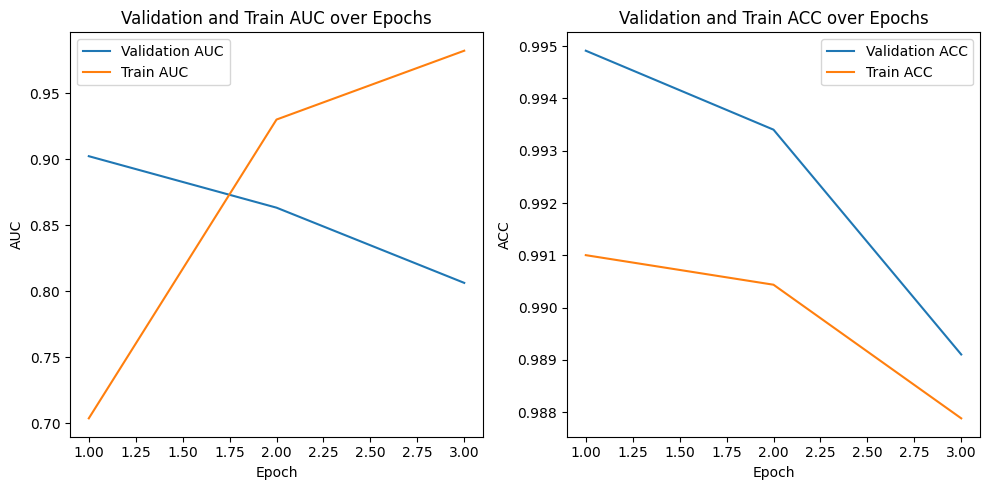

In [ ]:
from matplotlib import pyplot as plt
plt.figure(figsize=(10, 5))

# Exemplo de plotagem de métricas
plt.subplot(1, 2, 1)
plt.plot(epochs, metrics['val']['auc'][1:], label='Validation AUC')
plt.plot(epochs, metrics['train']['auc'], label='Train AUC')
plt.xlabel('Epoch')
plt.ylabel('AUC')
plt.title('Validation and Train AUC over Epochs')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(epochs, metrics['val']['acc'][1:], label='Validation ACC')
plt.plot(epochs, metrics['train']['acc'], label='Train ACC')
plt.xlabel('Epoch')
plt.ylabel('ACC')
plt.title('Validation and Train ACC over Epochs')
plt.legend()

plt.tight_layout()
plt.show()

É possível constatar que ocorre um overfitting do modelo no decorrer das épocas de treinamento. Logo, o modelo gerado após a primeira iteração no dataset é o mais apropriado para uso no dataset de teste e verificação de sua robustez.

## Teste

In [ ]:
trainer.test(model, datamodule)

INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:lightning.pytorch.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Testing: |          | 0/? [00:00<?, ?it/s]

Getting metrics for moment test at epoch 0
Len logits: 3754 Len labels: 3754
Loss: 0.043 ACC: 0.995 AUC 0.911





┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃        Test metric        ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│         test_acc          │    0.9953478574752808     │
│         test_auc          │    0.9106875658035278     │
│         test_loss         │   0.043233152478933334    │
│      test_loss_epoch      │    0.04308860003948212    │
└───────────────────────────┴───────────────────────────┘

[{'test_loss': 0.043233152478933334,
  'test_loss_epoch': 0.04308860003948212,
  'test_acc': 0.9953478574752808,
  'test_auc': 0.9106875658035278}]

O modelo obteve uma métrica AUC de 0.9, um valor alto. Isso comprova que o modelo é robusto a dados que não foram vistos no treinamento e pode ser utilizado em produção.

## Classe para predição de alvos

In [ ]:
from typing import List
import numpy as np

class TargetClassifier:
  def __init__(self, model: CustomModule, tokenizer: AutoTokenizer):
    self.model = model
    self.tokenizer = tokenizer


  def tokenize(self, texts: List[str]):
    return self.tokenizer(texts, return_token_type_ids=False)

  def convertTokenPredictionToWordPrediction(self, predictions: List[int], wordIds: List[int]) -> List[float]:
    predictionsFrase = []

    currWordPredictions = []
    prevWord = None

    for idx, word in enumerate(wordIds):
      if word is None and len(currWordPredictions) > 0:
        predictionsFrase.append(currWordPredictions)
        currWordPredictions = []
      elif word is None:
        continue
      elif word == prevWord or prevWord is None:
        currWordPredictions.append(predictions[idx])
      elif word != prevWord:
        predictionsFrase.append(currWordPredictions)
        currWordPredictions = [predictions[idx]]

      prevWord = word
    predictionsFraseMean = []

    for predictions in predictionsFrase:
      predictionsFraseMean.append(np.mean(predictions))
    return np.array(predictionsFraseMean)

  def fromTokensToWords(self, tokens: List[str], wordIds: List[int]):
    prevWord=None
    words = []
    for token, wordId in zip(tokens, wordIds):
      if wordId is None:
        continue
      elif wordId != prevWord:
        words.append(token)
      else:
        words[-1] += token[2:]
      prevWord = wordId
    return words


  def classify(self, inputs: List[str]):

    #Tokenization
    model_inputs = self.tokenize(inputs)

    input_ids = model_inputs["input_ids"]
    attention_mask = model_inputs["attention_mask"]

    #Dealing with data and dataloader
    df = pd.DataFrame({"input_ids": input_ids, "attention_mask": attention_mask})
    dataset = CustomDataset(df)

    dataLoader =  DataLoader(
        dataset, collate_fn=data_collator, batch_size=32
    )



    predictionsPerFrase = []
    wordsPerFrase = []

    #Get words from tokenizer
    for idx, frase_input_ids in enumerate(input_ids):

      tokens = self.tokenizer.convert_ids_to_tokens(frase_input_ids)
      wordIds = model_inputs.word_ids(idx)
      words = self.fromTokensToWords(tokens, wordIds)
      wordsPerFrase.append(words)

    #Iterate through batches
    lowerBound=0
    for batchIdx, batch in enumerate(dataLoader):
      input_ids = batch["input_ids"].to(self.model.device)
      attention_mask = batch["attention_mask"].to(self.model.device)

      output = self.model.prediction_step(input_ids, attention_mask)
      logits = output.logits.cpu().detach().numpy()

      #As we have 2 classes, we want to get the one with the highest logit per token, which is in the third axis
      predictionsToken = np.argmax(logits, axis=2)

      upperBound = (batchIdx + 1 ) * logits.shape[0]

      #For each sentence, we get the word ids and transform the token predictions into word predictions
      for i, predictionsTokens in zip(range(lowerBound, upperBound), predictionsToken):
        wordIds = model_inputs.word_ids(i)
        predictionsFrase = self.convertTokenPredictionToWordPrediction(predictionsTokens, wordIds)
        predictionsFrase[predictionsFrase > 0.5] = 1
        predictionsFrase[predictionsFrase <= 0.5] = 0
        predictionsPerFrase.append(predictionsFrase)
      lowerBound = upperBound

    return {"palavras": wordsPerFrase, "labels": predictionsPerFrase}


In [ ]:
classifier = TargetClassifier(model, tokenizer)

In [ ]:
inputs = [
    "O livro é maravilhoso",
    "Os personagens são horríveis",
    "É uma história cativante",
    "Adorei a história mas a personagem principal é fraca"
]

In [ ]:
classifier.classify(inputs)

{'palavras': [['O', 'livro', 'é', 'maravilhoso'],
  ['Os', 'personagens', 'são', 'horríveis'],
  ['É', 'uma', 'história', 'cativante'],
  ['Adorei',
   'a',
   'história',
   'mas',
   'a',
   'personagem',
   'principal',
   'é',
   'fraca']],
 'labels': [array([0., 1., 0., 0.]),
  array([0., 1., 0., 0.]),
  array([0., 0., 1., 0.]),
  array([0., 0., 1., 0., 0., 1., 1., 0., 0.])]}

# Abordagem Neural - Predição de Sentimento para Alvo

In [ ]:
import pickle
from google.colab import drive
import os
import torch
from transformers import AutoModelForSequenceClassification, AutoTokenizer, AdamW, get_linear_schedule_with_warmup
import pandas as pd
import pytorch_lightning as pl
from torch.utils.data import DataLoader
from sklearn.model_selection import train_test_split
import torchmetrics
from sklearn.metrics import accuracy_score, roc_auc_score
import multiprocessing as mp
from pytorch_lightning.callbacks import ModelCheckpoint
from pytorch_lightning.loggers import TensorBoardLogger
import plotly.express as px
import pandas as pd
import numpy as np

In [ ]:
# Convertendo os dados para um DataFrame
df = pd.DataFrame(frasesPredicaoSentimento)

## Classe Dataset e DataModule

In [ ]:
# Dataset e DataLoader
class EmotionDataset(torch.utils.data.Dataset):
    def __init__(self, data: pd.DataFrame, tokenizer: AutoTokenizer, max_token_len):
        self.tokenizer = tokenizer
        self.data = data
        self.max_token_len = max_token_len

    def __len__(self):
        return len(self.data)

    def __getitem__(self, index: int):
        data_row = self.data.iloc[index]
        text = data_row['frase']
        labels = data_row['label']
        encoding = self.tokenizer.encode_plus(
            text,
            add_special_tokens=True,
            max_length=self.max_token_len,
            return_token_type_ids=False,
            padding="max_length",
            truncation=True,
            return_attention_mask=True,
            return_tensors='pt',
        )
        return dict(
            input_ids=encoding["input_ids"].flatten(),
            attention_mask=encoding["attention_mask"].flatten(),
            labels=torch.tensor(labels, dtype=torch.long)
        )

In [ ]:
class EmotionDataModule(pl.LightningDataModule):
    def __init__(self, df_train, df_validation, df_test, tokenizer, batch_size, max_token_len):
        super().__init__()
        self.batch_size = batch_size
        self.df_train = df_train
        self.df_validation = df_validation
        self.df_test = df_test
        self.tokenizer = tokenizer
        self.max_token_len = max_token_len

    def setup(self, stage=None):
        self.train_dataset = EmotionDataset(self.df_train, self.tokenizer, self.max_token_len)
        self.validation_dataset = EmotionDataset(self.df_validation, self.tokenizer, self.max_token_len)
        self.test_dataset = EmotionDataset(self.df_test, self.tokenizer, self.max_token_len)

    def train_dataloader(self):
        return DataLoader(self.train_dataset, batch_size=self.batch_size, shuffle=True, num_workers=2)

    def val_dataloader(self):
        return DataLoader(self.validation_dataset, batch_size=self.batch_size, num_workers=2, persistent_workers=True)

    def test_dataloader(self):
        return DataLoader(self.test_dataset, batch_size=self.batch_size, num_workers=2)


##Modelo

In [ ]:
class EmotionTagger(pl.LightningModule):
    def __init__(self, n_classes, model_name, samples_per_classes, beta, n_training_steps, n_warmup_steps, no_cuda):
        super().__init__()
        self.bert = AutoModelForSequenceClassification.from_pretrained(model_name, num_labels=n_classes)
        self.samples_per_classes = samples_per_classes
        self.beta = beta
        self.n_training_steps = n_training_steps
        self.n_warmup_steps = n_warmup_steps
        self.n_classes = n_classes
        self.no_cuda = no_cuda

        # Congelando todas as camadas, exceto as últimas 5
        for param in self.bert.base_model.parameters():
            param.requires_grad = False
        for param in self.bert.base_model.encoder.layer[-5:].parameters():
            param.requires_grad = True

        # Defina a métrica de acurácia para classificação multiclasse
        self.test_acc = torchmetrics.Accuracy(task='multiclass', num_classes=n_classes)

        # Definindo as métricas
        self.metrics = {
            'train': {'loss': [], 'acc': [], 'auc': []},
            'val':   {'loss': [], 'acc': [], 'auc': []},
            'test':  {'loss': [], 'acc': [], 'auc': []}
        }

        self.lists = {
            'train': {'loss': [], 'logits': [], 'labels': []},
            'val':   {'loss': [], 'logits': [], 'labels': []},
            'test':  {'loss': [], 'logits': [], 'labels': []}
        }

    def forward(self, input_ids, attention_mask, labels=None):
        output = self.bert(input_ids, attention_mask=attention_mask)
        logits = output.logits
        loss = 0
        if labels is not None:
            loss = torch.nn.functional.cross_entropy(logits, labels)
        return loss, logits

    def step(self, batch, batch_idx, moment):
        input_ids, attention_mask, labels = batch['input_ids'], batch['attention_mask'], batch['labels']

        loss, logits = self(input_ids, attention_mask, labels)
        self.lists[moment]['loss'].append(loss)
        self.lists[moment]['logits'].append(logits)
        self.lists[moment]['labels'].append(labels)

        self.log("{}_loss".format(moment), loss, prog_bar=True)

        return dict(loss=loss, prediction=logits, labels=labels)


    def register_metrics(self, moment):
        print(f"Getting metrics for moment {moment} at epoch {self.current_epoch}")
        loss = self.lists[moment]['loss']
        logits = self.lists[moment]['logits']
        labels = self.lists[moment]['labels']

        print(f"Len logits: {len(logits)} Len labels: {len(labels)}")

        loss_mean = torch.stack(loss).mean()
        logits = torch.cat(logits, dim=0)
        labels = torch.cat(labels, dim=0)

        # Calcular métricas como acurácia e AUC
        preds = torch.argmax(logits, dim=1)
        acc = accuracy_score(labels.detach().cpu(), preds.detach().cpu())
        auc = roc_auc_score(labels.detach().cpu(), torch.softmax(logits, dim=1)[:, 1].detach().cpu())

        print("Loss: {:.3f} ACC: {:.3f} AUC {:.3f}".format(loss_mean.item(), acc, auc))
        print("\n\n")

        # Registrar as métricas
        self.log('{}_loss_epoch'.format(moment), loss_mean, on_epoch=True)
        self.log('{}_acc'.format(moment), acc, on_epoch=True)
        self.log('{}_auc'.format(moment), auc, on_epoch=True)

        self.metrics[moment]['loss'].append(loss_mean.item())
        self.metrics[moment]['acc'].append(acc)
        self.metrics[moment]['auc'].append(auc)

    def accessMetrics(self):
      return self.metrics

    def resetLists(self, moment: str):
      self.lists[moment]['loss'] = []
      self.lists[moment]['logits'] = []
      self.lists[moment]['labels'] = []


    def on_train_epoch_start(self) -> None:
      super().on_train_epoch_start()
      self.resetLists('train')

    def training_step(self, batch, batch_idx):
      return self.step(batch, batch_idx, 'train')

    def on_train_epoch_end(self):
      self.register_metrics('train')


    def on_validation_epoch_start(self) -> None:
      super().on_validation_epoch_start()
      self.resetLists('val')

    def validation_step(self, batch, batch_idx):
      return self.step(batch, batch_idx, 'val')

    def on_validation_epoch_end(self):
        self.register_metrics('val')


    def on_test_epoch_start(self) -> None:
      super().on_test_epoch_start()
      self.resetLists('test')


    def test_step(self, batch, batch_idx):
      return self.step(batch, batch_idx, 'test')

    def on_test_epoch_end(self):
      self.register_metrics('test')


    def prediction_step(self, input_ids, attention_mask):
      output = self.bert(input_ids, attention_mask)
      return output


    def configure_optimizers(self):
        optimizer = AdamW(self.parameters(), lr=2e-5)
        scheduler = get_linear_schedule_with_warmup(
            optimizer,
            num_warmup_steps=self.n_warmup_steps,
            num_training_steps=self.n_training_steps
        )
        return dict(
            optimizer=optimizer,
            lr_scheduler=dict(
                scheduler=scheduler,
                interval='step'
            )
        )

    def on_save_checkpoint(self, checkpoint):
      checkpoint['metrics'] = self.metrics

    def on_load_checkpoint(self, checkpoint):
       if 'metrics' in checkpoint:
            self.metrics = checkpoint['metrics']


## Treinamento

In [ ]:
modelDir = os.path.join(caminho, 'model_checkpoint/sentimentPrediction')
log_dir = os.path.join(caminho, 'model_log/sentimentPrediction')

os.makedirs(log_dir, exist_ok=True)
logger = TensorBoardLogger(save_dir=log_dir, name='sentimentPrediction')

# Configuração do treinamento
BATCH_SIZE = 4
MAX_TOKEN_LEN = 128
N_CLASSES = 2
N_EPOCHS = 7
MODEL_NAME = "neuralmind/bert-base-portuguese-cased"

# Tokenizer
tokenizer = AutoTokenizer.from_pretrained(MODEL_NAME)

# Dividir os dados em treino, validação e teste
df_train, df_temp = train_test_split(df, test_size=0.3, random_state=42)
df_val, df_test = train_test_split(df_temp, test_size=0.5, random_state=42)

# Data Module
data_module = EmotionDataModule(df_train, df_val, df_test, tokenizer, BATCH_SIZE, MAX_TOKEN_LEN)

steps_per_epoch = len(df_train) // BATCH_SIZE
total_training_steps = steps_per_epoch * N_EPOCHS
warmup_steps = total_training_steps // 5

modelSentPred = EmotionTagger(
    n_classes=N_CLASSES,
    model_name=MODEL_NAME,
    samples_per_classes=[sum(df_train['label'] == i) for i in range(N_CLASSES)],
    beta=0.9999,
    n_training_steps=total_training_steps,
    n_warmup_steps=warmup_steps,
    no_cuda=False
)

checkpoint_callbackSentPred = ModelCheckpoint(
        dirpath=modelDir,
        filename="{epoch}-{val_loss:.3f}",
        verbose=True,
        monitor="val_loss",
        mode='min'
)


trainerSentPred = pl.Trainer(
    max_epochs=N_EPOCHS,
    accelerator="gpu" if torch.cuda.is_available() else "cpu",
    callbacks=[checkpoint_callbackSentPred],
    logger=logger
)

# Obtém o otimizador e o agendador do método configure_optimizers
optimizers_schedulers = modelSentPred.configure_optimizers()
optimizer = optimizers_schedulers['optimizer']
scheduler = optimizers_schedulers['lr_scheduler']['scheduler']

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at neuralmind/bert-base-portuguese-cased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:588: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


In [ ]:
arquivos = [f for f in os.listdir(modelDir) if f != 'model_checkpoint.pth']

usingModelFromCheckpoint = recover_checkpoint and len(arquivos) > 0

if not usingModelFromCheckpoint:
  trainerSentPred.fit(modelSentPred,  data_module)
  print('Best model saved at:', checkpoint_callback.best_model_path)
else:
  modelSentPred = EmotionTagger.load_from_checkpoint(
              modelDir + "/epoch=3-val_loss=0.102.ckpt",
              n_classes=N_CLASSES,
              model_name=MODEL_NAME,
              samples_per_classes=[sum(df_train['label'] == i) for i in range(N_CLASSES)],
              beta=0.9999,
              n_training_steps=total_training_steps,
              n_warmup_steps=warmup_steps,
              no_cuda=False
  )

/usr/local/lib/python3.10/dist-packages/pytorch_lightning/callbacks/model_checkpoint.py:652: Checkpoint directory /content/drive/.shortcut-targets-by-id/1b-KirLCYTaUwxoR6tb_qhh2rKdRgN62b/Análise de Sentimentos /model_checkpoint/sentimentPrediction exists and is not empty.
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:pytorch_lightning.callbacks.model_summary:
  | Name     | Type                          | Params | Mode 
-------------------------------------------------------------------
0 | bert     | BertForSequenceClassification | 108 M  | eval 
1 | test_acc | MulticlassAccuracy            | 0      | train
-------------------------------------------------------------------
35.4 M    Trainable params
73.5 M    Non-trainable params
108 M     Total params
435.699   Total estimated model params size (MB)


Sanity Checking: |          | 0/? [00:00<?, ?it/s]

/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


Getting metrics for moment val at epoch 0
Len logits: 2 Len labels: 2
Loss: 0.681 ACC: 0.625 AUC 0.417





/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 0, global step 739: 'val_loss' reached 0.22862 (best 0.22862), saving model to '/content/drive/.shortcut-targets-by-id/1b-KirLCYTaUwxoR6tb_qhh2rKdRgN62b/Análise de Sentimentos /model_checkpoint/sentimentPrediction/epoch=0-val_loss=0.229.ckpt' as top 1


Getting metrics for moment val at epoch 0
Len logits: 159 Len labels: 159
Loss: 0.228 ACC: 0.908 AUC 0.973



Getting metrics for moment train at epoch 0
Len logits: 739 Len labels: 739
Loss: 0.423 ACC: 0.829 AUC 0.787





/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 1, global step 1478: 'val_loss' reached 0.14646 (best 0.14646), saving model to '/content/drive/.shortcut-targets-by-id/1b-KirLCYTaUwxoR6tb_qhh2rKdRgN62b/Análise de Sentimentos /model_checkpoint/sentimentPrediction/epoch=1-val_loss=0.146.ckpt' as top 1


Getting metrics for moment val at epoch 1
Len logits: 159 Len labels: 159
Loss: 0.146 ACC: 0.946 AUC 0.982



Getting metrics for moment train at epoch 1
Len logits: 739 Len labels: 739
Loss: 0.182 ACC: 0.934 AUC 0.967





/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 2, global step 2217: 'val_loss' reached 0.11870 (best 0.11870), saving model to '/content/drive/.shortcut-targets-by-id/1b-KirLCYTaUwxoR6tb_qhh2rKdRgN62b/Análise de Sentimentos /model_checkpoint/sentimentPrediction/epoch=2-val_loss=0.119.ckpt' as top 1


Getting metrics for moment val at epoch 2
Len logits: 159 Len labels: 159
Loss: 0.118 ACC: 0.953 AUC 0.987



Getting metrics for moment train at epoch 2
Len logits: 739 Len labels: 739
Loss: 0.096 ACC: 0.962 AUC 0.991





/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 3, global step 2956: 'val_loss' reached 0.10212 (best 0.10212), saving model to '/content/drive/.shortcut-targets-by-id/1b-KirLCYTaUwxoR6tb_qhh2rKdRgN62b/Análise de Sentimentos /model_checkpoint/sentimentPrediction/epoch=3-val_loss=0.102.ckpt' as top 1


Getting metrics for moment val at epoch 3
Len logits: 159 Len labels: 159
Loss: 0.102 ACC: 0.962 AUC 0.989



Getting metrics for moment train at epoch 3
Len logits: 739 Len labels: 739
Loss: 0.051 ACC: 0.979 AUC 0.998





/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 4, global step 3695: 'val_loss' was not in top 1


Getting metrics for moment val at epoch 4
Len logits: 159 Len labels: 159
Loss: 0.130 ACC: 0.957 AUC 0.989



Getting metrics for moment train at epoch 4
Len logits: 739 Len labels: 739
Loss: 0.026 ACC: 0.991 AUC 0.999





/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 5, global step 4434: 'val_loss' was not in top 1


Getting metrics for moment val at epoch 5
Len logits: 159 Len labels: 159
Loss: 0.132 ACC: 0.962 AUC 0.988



Getting metrics for moment train at epoch 5
Len logits: 739 Len labels: 739
Loss: 0.017 ACC: 0.993 AUC 1.000





/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 6, global step 5173: 'val_loss' was not in top 1
INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=7` reached.


Getting metrics for moment val at epoch 6
Len logits: 159 Len labels: 159
Loss: 0.142 ACC: 0.967 AUC 0.988



Getting metrics for moment train at epoch 6
Len logits: 739 Len labels: 739
Loss: 0.007 ACC: 0.998 AUC 1.000





/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


Best model saved at: 


In [ ]:
checkpoint_callbackSentPred.best_model_path

'/content/drive/.shortcut-targets-by-id/1b-KirLCYTaUwxoR6tb_qhh2rKdRgN62b/Análise de Sentimentos /model_checkpoint/sentimentPrediction/epoch=3-val_loss=0.102.ckpt'

## Métricas

In [ ]:
metrics = modelSentPred.accessMetrics()

In [ ]:
# lista de épocas
epochs = list(np.arange(0, len(metrics['train']['loss'])))

# Preparar os dados para AUC
data_auc = {
    'Epoch': epochs + epochs,
    'AUC': metrics['train']['auc'] + metrics['val']['auc'][1:],
    'Type': ['Train'] * len(metrics['train']['auc']) + ['Validation'] * (len(metrics['val']['auc']) - 1)
}
df_auc = pd.DataFrame(data_auc)

# Preparar os dados para ACC
data_acc = {
    'Epoch': epochs + epochs,
    'ACC': metrics['train']['acc'] + metrics['val']['acc'][1:],
    'Type': ['Train'] * len(metrics['train']['acc']) + ['Validation'] * (len(metrics['val']['acc']) - 1)
}
df_acc = pd.DataFrame(data_acc)

# Plotar AUC
fig_auc = px.line(df_auc, x='Epoch', y='AUC', color='Type', title='Validation and Train AUC over Epochs')
fig_auc.show()

# Plotar ACC
fig_acc = px.line(df_acc, x='Epoch', y='ACC', color='Type', title='Validation and Train ACC over Epochs')
fig_acc.show()


## Teste

In [ ]:
trainerSentPred.test(modelSentPred, datamodule=data_module)



INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning:

os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.



Testing: |          | 0/? [00:00<?, ?it/s]

Getting metrics for moment test at epoch 7
Len logits: 159 Len labels: 159
Loss: 0.176 ACC: 0.954 AUC 0.988





┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃        Test metric        ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│         test_acc          │    0.9542586803436279     │
│         test_auc          │    0.9882827401161194     │
│         test_loss         │    0.17664027214050293    │
│      test_loss_epoch      │    0.1760885864496231     │
└───────────────────────────┴───────────────────────────┘

[{'test_loss': 0.17664027214050293,
  'test_loss_epoch': 0.1760885864496231,
  'test_acc': 0.9542586803436279,
  'test_auc': 0.9882827401161194}]

## Salvar e Carregar o Modelo

In [ ]:
# Salvar o modelo após o treinamento
def save_model_checkpoint(model, optimizer, scheduler, epoch, path):
    checkpoint = {
        'model_state_dict': model.state_dict(),
        'optimizer_state_dict': optimizer.state_dict(),
        'scheduler_state_dict': scheduler.state_dict(),
        'epoch': epoch,
        'metrics': model.metrics,
        'samples_per_classes': model.samples_per_classes,
        'beta': model.beta,
        'n_training_steps': model.n_training_steps,
        'n_warmup_steps': model.n_warmup_steps,
        'n_classes': model.n_classes,
        'no_cuda': model.no_cuda,
    }
    torch.save(checkpoint, path)


# Carregar o modelo a partir de um checkpoint
def load_model_checkpoint(model, optimizer, scheduler, path):
    checkpoint = torch.load(path)
    model.load_state_dict(checkpoint['model_state_dict'])
    optimizer.load_state_dict(checkpoint['optimizer_state_dict'])
    scheduler.load_state_dict(checkpoint['scheduler_state_dict'])
    epoch = checkpoint['epoch']
    model.metrics = checkpoint['metrics']
    model.samples_per_classes = checkpoint['samples_per_classes']
    model.beta = checkpoint['beta']
    model.n_training_steps = checkpoint['n_training_steps']
    model.n_warmup_steps = checkpoint['n_warmup_steps']
    model.n_classes = checkpoint['n_classes']
    model.no_cuda = checkpoint['no_cuda']
    return model, optimizer, scheduler, epoch

In [ ]:
save_model_checkpoint(modelSentPred, optimizer, scheduler, epoch=(N_EPOCHS-1), path=os.path.join(modelDir, 'model_checkpoint.pth') )


## Classe para predição de sentimentos direcionados a alvos

In [ ]:
from typing import List
import numpy as np

class SentimentClassifier:
  def __init__(self, model: EmotionTagger, tokenizer: AutoTokenizer, preditorAlvo: CustomModule, treshHold):
    self.model = model
    self.tokenizer = tokenizer
    self.preditorAlvo = preditorAlvo
    self.device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    self.model.to(self.device)
    self.treshHold = treshHold


  def getInputSentences(self, sentence, target):
    return sentence + "[SEP] Qual a polaridade da palavra {} na frase anterior?".format(target)

  def predictOpinion(self, sentence):
    model.eval()
    m = torch.nn.Softmax(dim=1)

    encoding = self.tokenizer.encode_plus(
        sentence,
        add_special_tokens=True,
        max_length=512,
        return_token_type_ids=False,
        padding='max_length',
        truncation=True,
        return_attention_mask=True,
        return_tensors='pt'
    )
    input_ids = encoding['input_ids'].to(self.device)
    attention_mask = encoding['attention_mask'].to(self.device)

    with torch.no_grad():
        loss, logits = self.model(input_ids, attention_mask)
        pred = m(logits)
    return "+" if pred[0][1].item() > self.treshHold else '-'


  def classify(self, inputs: List[str]):

    predicaoAlvos = self.preditorAlvo.classify(inputs)
    predicaoAlvos['opinioes'] = []

    for frase, palavras, labelsAlvo in zip(inputs, predicaoAlvos['palavras'], predicaoAlvos['labels']):

      opinioes = []

      for idx, label in enumerate(labelsAlvo):
        if label == 0:
          opinioes.append('O')
        else:
          inputModel = self.getInputSentences(frase, palavras[idx])
          opinioes.append(self.predictOpinion(inputModel))
      predicaoAlvos['opinioes'].append(opinioes)

    return pd.DataFrame(predicaoAlvos)

In [ ]:
classifier = TargetClassifier(model, tokenizer)
sentClassifier = SentimentClassifier(modelSentPred, tokenizer, classifier, 0.4)

In [ ]:
inputs = [
    "O livro é maravilhoso",
    "Os personagens são horríveis",
    "É uma história cativante",
    "Adorei a história mas a personagem principal é fraca",
    "Não gostei do livro, mas adorei como os personagens"
]

In [ ]:
sentClassifier.classify(inputs)

,palavras,labels,opinioes
0,"[O, livro, é, maravilhoso]","[0.0, 1.0, 0.0, 0.0]","[O, +, O, O]"
1,"[Os, personagens, são, horríveis]","[0.0, 1.0, 0.0, 0.0]","[O, -, O, O]"
2,"[É, uma, história, cativante]","[0.0, 0.0, 1.0, 0.0]","[O, O, +, O]"
3,"[Adorei, a, história, mas, a, personagem, prin...","[0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0]","[O, O, +, O, O, -, -, O, O]"
4,"[Não, gostei, do, livro, ,, mas, adorei, como,...","[0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[O, O, O, -, O, O, O, O, O, +]"
